In [38]:
from warnings import filterwarnings
filterwarnings('ignore')

In [39]:
import pandas as pd
df=pd.read_csv("C:\\Users\\Aryan\\OneDrive\\Desktop\\DataSet\\iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## label encoding the target feature

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["species"]=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Seprate dependant and indepandant

In [43]:
X=df.drop(labels=["species"],axis=1)
Y=df[["species"]]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Train test split

In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
xtrain.shape,ytrain.shape

((120, 4), (120, 1))

### Building a Decision tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=2,criterion='entropy')
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal_width <= 0.8\nentropy = 1.583\nsamples = 120\nvalue = [39, 38, 43]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.6, 0.5, 'petal_length <= 4.95\nentropy = 0.997\nsamples = 81\nvalue = [0, 38, 43]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.378\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 40\nvalue = [0, 0, 40]')]

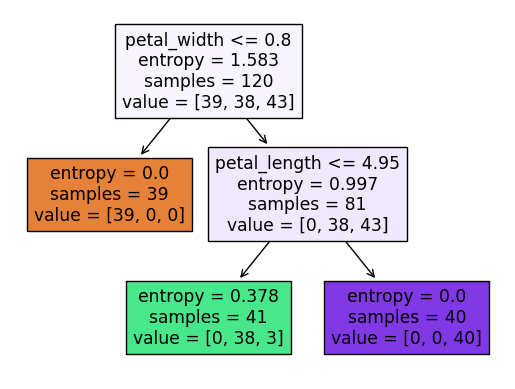

In [46]:
from sklearn.tree import plot_tree
plot_tree(model,feature_names=xtrain.columns,filled=True)

### Evaluate the model


In [47]:
model.score(xtrain,ytrain)

0.975

In [48]:
model.score(xtest,ytest)

0.8333333333333334

In [49]:
from sklearn.metrics import confusion_matrix
ypred_tr=model.predict(xtrain)
ypred_ts=model.predict(xtest)
cf=confusion_matrix(ytest,ypred_ts)
cf

array([[11,  0,  0],
       [ 0, 10,  2],
       [ 0,  3,  4]], dtype=int64)

<Axes: >

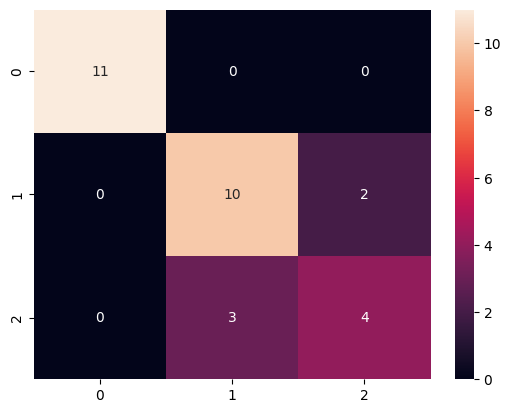

In [50]:
import seaborn as sns
sns.heatmap(cf,annot=True,fmt='d')

In [51]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.77      0.83      0.80        12
           2       0.67      0.57      0.62         7

    accuracy                           0.83        30
   macro avg       0.81      0.80      0.81        30
weighted avg       0.83      0.83      0.83        30



In [52]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,xtrain,ytrain,cv=5,scoring="accuracy")
score

array([0.95833333, 0.91666667, 1.        , 1.        , 1.        ])

In [53]:
score.mean()

0.975

In [54]:
score2=cross_val_score(model,xtrain,ytrain,cv=5,scoring="f1_macro")
score2

array([0.95816993, 0.91666667, 1.        , 1.        , 1.        ])

In [55]:
score2.mean()

0.9749673202614378

### Hyperparameter tuning : GridSearchCV
~~~
Max Depth
Min Samples Split
Min Samples Leaf
Criterion : Gini, Entropy
~~~

In [56]:
params={'max_depth':[2,3,4,5],
        'min_samples_split':[6,7,8,9,10],
        'criterion':['entropy','gini']}

In [57]:
from sklearn.model_selection import GridSearchCV
model1=DecisionTreeClassifier()
gscv=GridSearchCV(model1,param_grid=params,cv=5,scoring="f1_macro")
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [6, 7, 8, 9, 10]},
             scoring='f1_macro')

In [58]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 6}

In [59]:
gscv.best_score_

0.9749673202614378

In [60]:
bestmodel=gscv.best_estimator_
bestmodel

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=6)

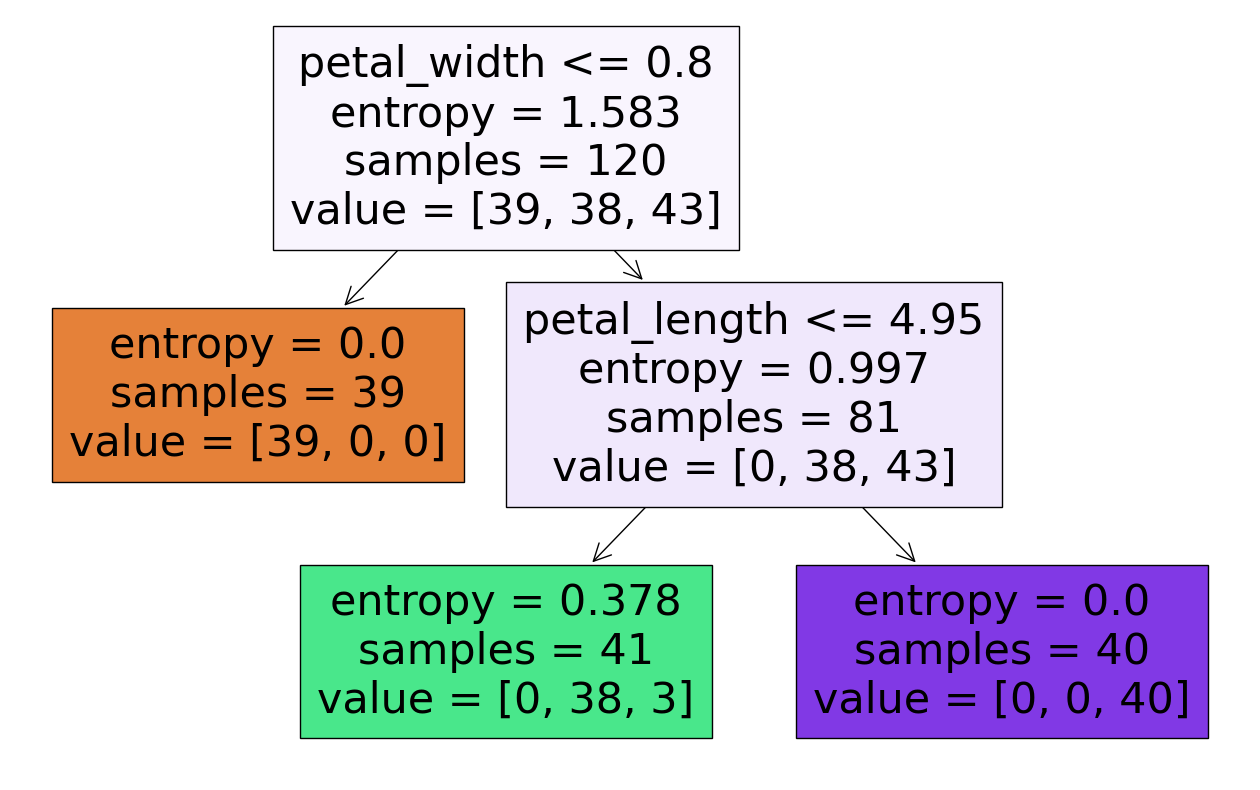

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plot_tree(bestmodel,feature_names=xtrain.columns,filled=True)
plt.show()

<Axes: >

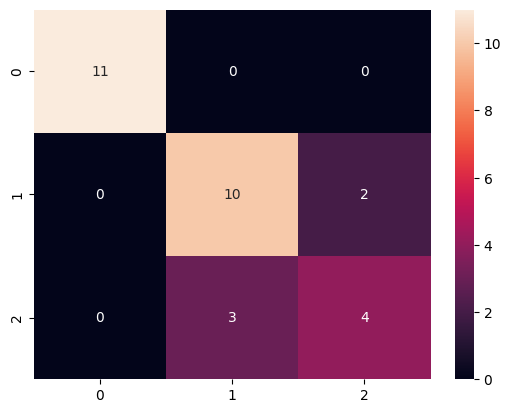

In [62]:
ypred_tr1=gscv.predict(xtrain)
ypred_ts1=gscv.predict(xtest)
cf1=confusion_matrix(ytest,ypred_ts1)
sns.heatmap(cf1,annot=True,fmt='d')

In [63]:
print(classification_report(ytest,ypred_ts1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.77      0.83      0.80        12
           2       0.67      0.57      0.62         7

    accuracy                           0.83        30
   macro avg       0.81      0.80      0.81        30
weighted avg       0.83      0.83      0.83        30



### Probability for every class

In [64]:
bestmodel.predict_proba(xtest)

array([[0.        , 0.92682927, 0.07317073],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.92682927, 0.07317073],
       [0.        , 0.92682927, 0.07317073],
       [1.        , 0.        , 0.        ],
       [0.        , 0.92682927, 0.07317073],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.92682927, 0.07317073],
       [0.        , 0.92682927, 0.07317073],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.92682927, 0.07317073],
       [0.        , 0.92682927, 0.07317073],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.92682927, 0.07317073],
       [0.        , 0.92682927, 0.07317073],
       [0.

### Inverse transform

In [65]:
tr_class=le.inverse_transform(ypred_tr1)
tr_class

array(['setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'v

In [66]:
ts_class= le.inverse_transform(ypred_ts1)
ts_class

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [67]:
ypred_tr1

array([0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 0, 1, 0,
       1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0,
       2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0,
       0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 0, 0, 1])